In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bct-summit/sample_submission.csv
/kaggle/input/bct-summit/train.csv
/kaggle/input/bct-summit/test.csv


In [2]:
df= pd.read_csv("/kaggle/input/bct-summit/train.csv")
#Change Atttrition from integer dtype type to object dtype
df['Attrition'] = df['Attrition'].astype(str)

In [3]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1677.0,838.000000,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0


In [5]:
df.describe(exclude=np.number).T

,count,unique,top,freq
BusinessTravel,1677,3,Travel_Rarely,1290
Department,1677,3,Research & Development,1167
EducationField,1677,6,Life Sciences,775
Gender,1677,2,Male,1064
JobRole,1677,9,Sales Executive,355
MaritalStatus,1677,3,Married,773
Over18,1677,1,Y,1677
OverTime,1677,2,No,1277
Attrition,1677,2,0,1477


In [6]:
#drop certain columns that have constant values throught and also the ID column.
col_to_drop1= ['id','EmployeeCount','StandardHours','Over18']

In [7]:
data = df.drop(col_to_drop1, axis=1)

In [8]:
test= pd.read_csv("/kaggle/input/bct-summit/test.csv")
test= test.drop(col_to_drop1, axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1677 non-null   int64 
 1   BusinessTravel            1677 non-null   object
 2   DailyRate                 1677 non-null   int64 
 3   Department                1677 non-null   object
 4   DistanceFromHome          1677 non-null   int64 
 5   Education                 1677 non-null   int64 
 6   EducationField            1677 non-null   object
 7   EnvironmentSatisfaction   1677 non-null   int64 
 8   Gender                    1677 non-null   object
 9   HourlyRate                1677 non-null   int64 
 10  JobInvolvement            1677 non-null   int64 
 11  JobLevel                  1677 non-null   int64 
 12  JobRole                   1677 non-null   object
 13  JobSatisfaction           1677 non-null   int64 
 14  MaritalStatus           

In [10]:
data.shape

(1677, 31)

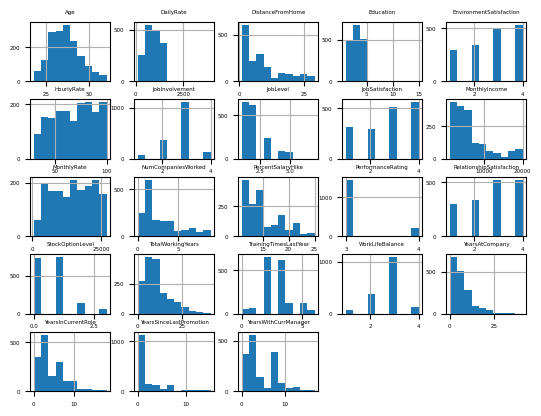

In [11]:
fig = data.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
plt.show()


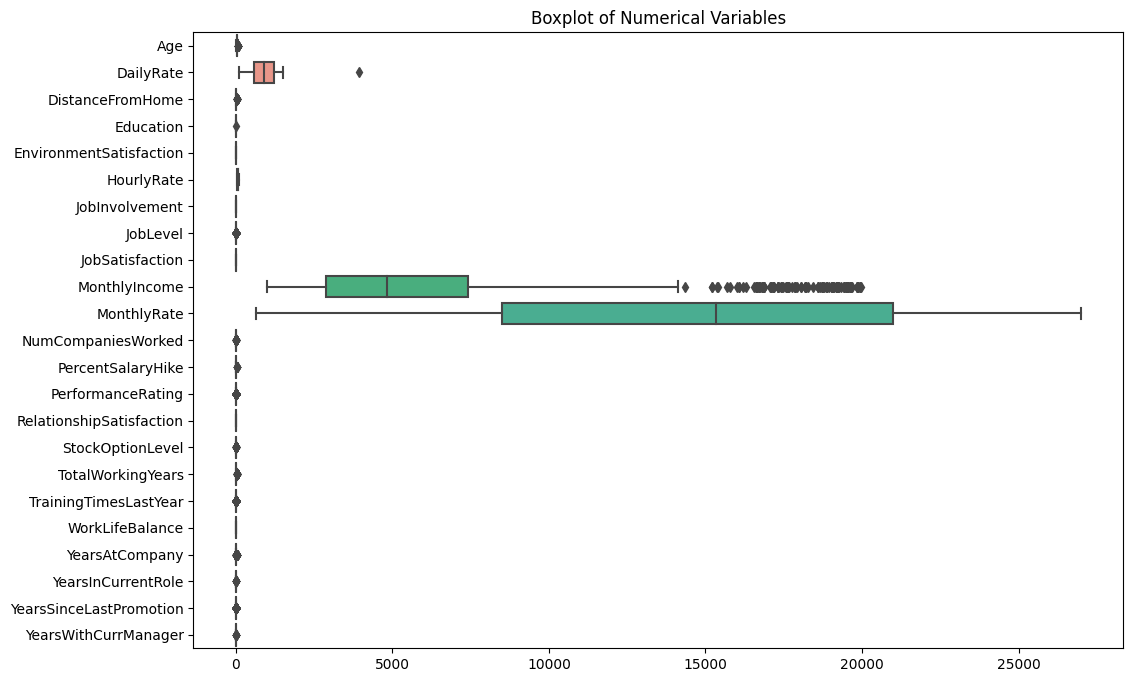

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot of Numerical Variables')
plt.show()

In [13]:
X=data.drop('Attrition', axis=1)
y=data['Attrition']

In [14]:
X.shape, y.shape

((1677, 30), (1677,))

In [15]:
num =X.select_dtypes(include=['float64', 'int64']).columns
cat= X.select_dtypes(include=['object', 'bool']).columns

In [16]:
X[num].shape, X[cat].shape

((1677, 23), (1677, 7))

In [17]:
y.value_counts(normalize=True)

Attrition
0    0.880739
1    0.119261
Name: proportion, dtype: float64

In [18]:
X[cat].head(2)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Yes
1,Travel_Rarely,Sales,Other,Male,Sales Representative,Married,No


In [19]:
X[num].head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,599,24,3,4,42,3,1,4,2596,...,3,2,1,10,2,3,10,0,7,8
1,35,921,8,3,1,46,3,1,1,2899,...,3,4,1,4,3,3,4,2,0,3


# LazyPredict

* This library will allow us to build a number of model with much code,and helps understand which models works better without any parameter tuning.
* After which we can then choose the top model to work with.
* The .fit method will return models and predictions.

In [20]:
#install the library
!pip install lazypredict -q

In [21]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  3.99it/s]


In [22]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.82,0.69,NaN,0.84,0.14
BernoulliNB,0.84,0.64,NaN,0.84,0.05
AdaBoostClassifier,0.88,0.62,0.62,0.87,0.44
Perceptron,0.87,0.61,NaN,0.86,0.14
GaussianNB,0.66,0.61,NaN,0.72,0.05
NearestCentroid,0.62,0.61,0.61,0.69,0.08
QuadraticDiscriminantAnalysis,0.54,0.59,0.59,0.62,0.22
LogisticRegression,0.88,0.59,0.59,0.86,0.27
LGBMClassifier,0.88,0.59,0.59,0.86,1.11


In [23]:
#View Prediction of each classifiers from lazy predict
predictions.head(2)

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,NearestCentroid,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,LGBMClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
# Lets observe the classification_report of each individual model
for i in predictions.columns.tolist():
    if i in ['AdaBoostClassifier','RandomForestClassifier', 'LogisticRegression']:
        print('\t\t',i,'\n')
        print(classification_report(y_test, predictions[i]),'\n')

		 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       296
           1       0.52      0.28      0.36        40

    accuracy                           0.88       336
   macro avg       0.72      0.62      0.65       336
weighted avg       0.86      0.88      0.87       336
 

		 LogisticRegression 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       296
           1       0.50      0.20      0.29        40

    accuracy                           0.88       336
   macro avg       0.70      0.59      0.61       336
weighted avg       0.85      0.88      0.86       336
 

		 RandomForestClassifier 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       296
           1       0.60      0.07      0.13        40

    accuracy                           0.88       336
   macro avg       0.74      0.53      0.54     

* Lets Examine the Classification report of the following algorithms; AdaBosst, RandomForest and LogisticRegression.
* Even though the models seems to achieve high accuracy, this can be decieving as the accracy only the ability of the model in predicting the majority class.
* This is further evident in the low recall observe in the minority class as shown in each of the classification report.
* This will be addressed by applying transformation such as synthetic oversampling or undersampling to the minority and majority class respectively.

# `Feature Selection With FeatureWiz`

*  Featurewiz is the best feature selection library for ml performance with minimal effort and maximum relevance using the famous MRMR algorithm.
* [featurewiz](https://pypi.org/project/featurewiz/)
* [featurewizDEMO](https://www.kaggle.com/code/rsesha/new-featurewiz-demo/notebook#Let's-compare-it-to-15-variables-from-featurewiz)

In [25]:
# pip install the library
!pip install featurewiz 

  Obtaining dependency information for featurewiz from https://files.pythonhosted.org/packages/4b/03/8b2cbff4c355830c4b1313e52ea40252f5923964374faffb84ea70beb6dc/featurewiz-0.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for lazytransform>=1.10 from https://files.pythonhosted.org/packages/f3/f8/97326fd03f4133850d9fda1e0d66b1b6b32a7882ef1f3e41597c99f8e180/lazytransform-1.10-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.1
    Uninstalling xgboost-2.0.1:
      Successfully uninstalled xgboost-2.0.1
  Attempting uninstall:

In [26]:
from featurewiz import featurewiz
#specify the target from your dataset
target = 'Attrition'

Imported lazytransform v1.9. 

Imported featurewiz 0.4.7. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True, scalers="std",
        		category_encoders="auto", add_missing=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [27]:
feats = featurewiz(data, target, corr_limit=0.7, verbose=0)
len(feats)

featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Binary_Classification problem 
    Loaded train data. Shape = (1677, 31)
    Single_Label Binary_Classification problem 
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or low-information variables found in data set
Removing 0 columns from further processing since ID or low information variables
    target labels need to be converted...
Completed label encoding of target variable = Attrition
How model predictions need to be transformed for Attrition:
	{

2

In [28]:
#print out the total number of features from which the 17 aboves were selected
oldfeats = [x for x in list(data) if x not in [target]]
len(oldfeats)

30

In [29]:
# Creating a new dataframe with the selected features from featurewiz
ndf= data[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate', 
           'StockOptionLevel', 'YearsAtCompany', 'OverTime', 'JobRole',
           'NumCompaniesWorked', 'RelationshipSatisfaction', 'YearsSinceLastPromotion',
           'TrainingTimesLastYear', 
           'JobLevel', 'EducationField', 'MaritalStatus', 'Gender', 'Attrition']]
ndf.head(2)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,StockOptionLevel,YearsAtCompany,OverTime,JobRole,NumCompaniesWorked,RelationshipSatisfaction,YearsSinceLastPromotion,TrainingTimesLastYear,JobLevel,EducationField,MaritalStatus,Gender,Attrition
0,36,599,24,42,5099,1,10,Yes,Laboratory Technician,1,2,7,2,1,Medical,Married,Male,0
1,35,921,8,46,10778,1,4,No,Sales Representative,1,4,0,3,1,Other,Married,Male,0


In [30]:
test = test[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate', 
           'StockOptionLevel', 'YearsAtCompany', 'OverTime', 'JobRole',
           'NumCompaniesWorked', 'RelationshipSatisfaction', 'YearsSinceLastPromotion',
           'TrainingTimesLastYear', 
           'JobLevel', 'EducationField', 'MaritalStatus', 'Gender']]
test.head(2)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,StockOptionLevel,YearsAtCompany,OverTime,JobRole,NumCompaniesWorked,RelationshipSatisfaction,YearsSinceLastPromotion,TrainingTimesLastYear,JobLevel,EducationField,MaritalStatus,Gender
0,19,992,1,43,17778,0,1,No,Laboratory Technician,1,4,0,2,1,Medical,Single,Male
1,45,1136,4,67,12421,1,2,Yes,Sales Executive,6,3,2,3,2,Marketing,Divorced,Male


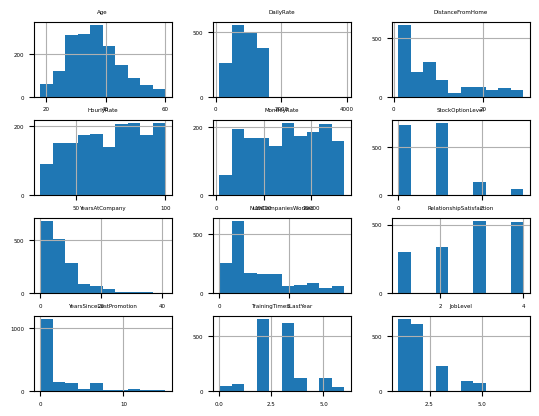

In [31]:
fig = ndf.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
plt.show()

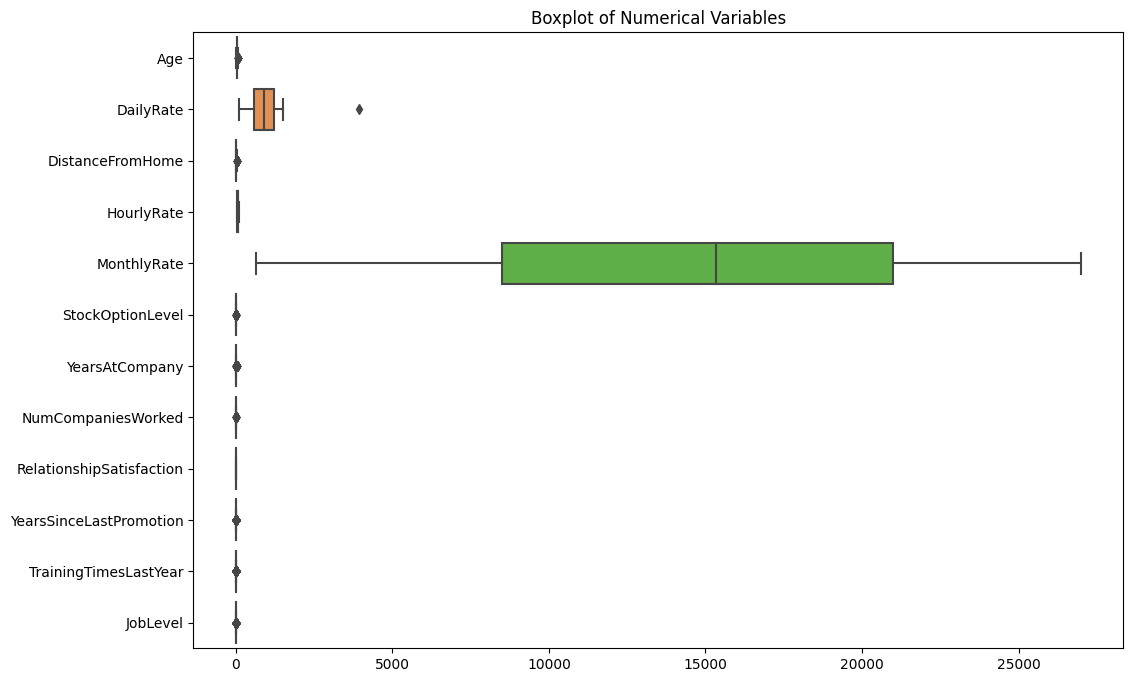

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=ndf, orient='h')
plt.title('Boxplot of Numerical Variables')
plt.show()

In [33]:
num =ndf.select_dtypes(include=['float64', 'int64']).columns
cat= ndf.select_dtypes(include=['object', 'bool']).columns
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, variable, k=1.5):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]

# Specify the columns for which you want to remove outliers
columns_to_remove_outliers = ndf[num]

# Remove outliers for each column
for col in columns_to_remove_outliers:
    ndf = remove_outliers_iqr(ndf, col)

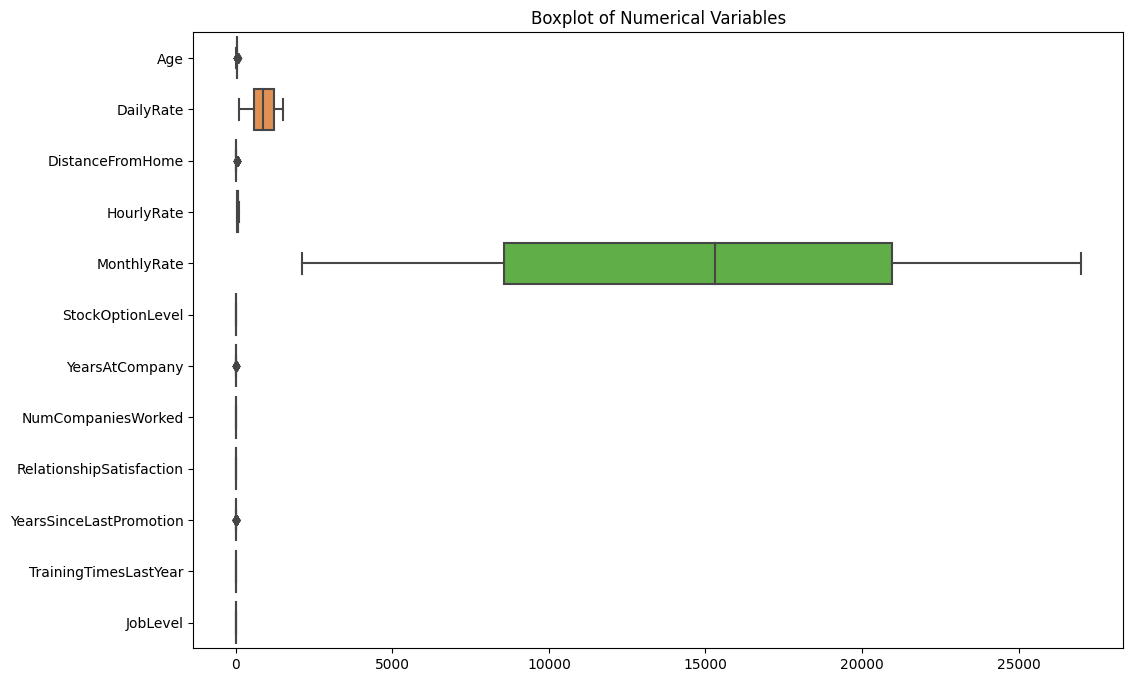

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=ndf, orient='h')
plt.title('Boxplot of Numerical Variables')
plt.show()

#      `SMOTE`
* We tried three different model above, each gave accuarcy above 80%, however, this isn't reliable as such accuracy for an imblance dataset is only predicting the majority class.
* This is reflected in a low recall of the minority class.
* One way to address this short coming is to either undersample the majority class or oversample the minority class.
* Smote implement a fit_resample method, which isn't compactable with pipeline from sklearn. This is because, Sklearn-pipeline support only transformations that implement a fit_transform method
* Thus, we will be using make_pipeline or Pipeline from imblearn.pipeline to over come this challenge.

* ndf conatians only the important features we derived from featurewiz

In [35]:
X=ndf.drop('Attrition', axis=1)
y=ndf['Attrition']

num =X.select_dtypes(include=['float64', 'int64']).columns
cat= X.select_dtypes(include=['object', 'bool']).columns

classifiers = {'RandomForest': RandomForestClassifier(n_estimators=200, bootstrap=True,
                            oob_score=True, random_state=43),
               "AdaBoost": AdaBoostClassifier(),
               "LogisticRegression":LogisticRegression(solver='lbfgs', max_iter=1000)}

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


sm= SMOTE(random_state=42)
ct = ColumnTransformer(  [("cats", OneHotEncoder(), cat),  ("nums", MinMaxScaler(),num)])

modelresults = {}   #a dictionary to hold the results of each model

for modelname, model in classifiers.items():
    pipeline =  Pipeline([('preprocess', ct), ('smote', sm), ('classifier', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    #model =
    pipeline =pipeline.fit(X_train, y_train) #model= ''''''
    pred = pipeline.predict(X_test) #model
    acc= round(pipeline.score(X_test, y_test)*100, 2) #model
    prob=pipeline.predict_proba(X_test)#model
    modelresults[modelname] = {
        'accuracy': acc,
        'predictions': pred,
        "probability": prob[:, 1],
        "model": pipeline   # model
    }
    print(modelname)
    print(f"model accuracy - {modelresults[modelname]['accuracy']}")
    print(f"model AUC-ROC  { roc_auc_score(y_test,  modelresults[modelname]['probability']) }")
    print(classification_report(y_test, modelresults[modelname]['predictions']) )
    print('*****************************************')

RandomForest
model accuracy - 88.0
model AUC-ROC  0.8794981060606061
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       176
           1       0.50      0.38      0.43        24

    accuracy                           0.88       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.87      0.88      0.87       200

*****************************************
AdaBoost
model accuracy - 86.0
model AUC-ROC  0.9083806818181819
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       176
           1       0.44      0.67      0.53        24

    accuracy                           0.86       200
   macro avg       0.70      0.78      0.73       200
weighted avg       0.89      0.86      0.87       200

*****************************************
LogisticRegression
model accuracy - 73.5
model AUC-ROC  0.8705018939393939
              precision    recall  f1-score   support

In [36]:
X_test.shape, test.shape

((200, 17), (1119, 17))

In [37]:
ada=modelresults['AdaBoost']['model']
ada

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cats', OneHotEncoder(),
                                                  Index(['OverTime', 'JobRole', 'EducationField', 'MaritalStatus', 'Gender'], dtype='object')),
                                                 ('nums', MinMaxScaler(),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate',
       'StockOptionLevel', 'YearsAtCompany', 'NumCompaniesWorked',
       'RelationshipSatisfaction', 'YearsSinceLastPromotion',
       'TrainingTimesLastYear', 'JobLevel'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', AdaBoostClassifier())])

In [38]:
prob = ada.predict_proba(test)[:,1]
len(prob)

1119

In [39]:
test= pd.read_csv("/kaggle/input/bct-summit/test.csv")
output = pd.DataFrame({"id":test['id'], "Attrition":prob})

output.head()

,id,Attrition
0,1677,0.49
1,1678,0.49
2,1679,0.48
3,1680,0.48
4,1681,0.51


In [40]:
output.to_csv("VictorJokanola_d5.csv", index=False)

## Using Cross Validation Over All the Dataset

In [41]:
# #cross validation with the intial 30 variables without applying smote to imbalance class

# X=data.drop('Attrition', axis=1)
# y=data['Attrition']

# num =X.select_dtypes(include=['float64', 'int64']).columns
# cat= X.select_dtypes(include=['object', 'bool']).columns

# classifiers = {
#     'RandomForest': RandomForestClassifier(n_estimators=200, bootstrap=True,
#                             oob_score=True, random_state=43),
#     "Ada": AdaBoostClassifier(),
#     #"lSVC":LinearSVC(),
#      "LogisticReg":LogisticRegression(solver='lbfgs', max_iter=1000),
#    #"DecisionTree":DecisionTreeClassifier(),
#    #"KNN":KNeighborsClassifier()
#   }
# modelresults = {}

# for modelname, model in classifiers.items():
#     pipe = Pipeline([('transform', ct), ('classifier', model)])
#     # define the model cross-validation configuration
#     cv = KFold(n_splits=10, shuffle=True, random_state=1)
#     # evaluate the pipeline using cross validation 
#     scores = cross_val_score(pipe, X, y, cv=cv,n_jobs=-1)
#     acc= round(scores.mean()*100, 2)
#     modelresults[modelname]= acc

# print(modelresults)

## SMOTE

* We tried four different model above, each gave accuarcy above 80%, however, this isn't reliable as such accuracy for an imblance dataset is only predicting the majority class.
* This is reflected in a low recall of the minority class. 
* One way to address this short coming is to either undersample the majority class or oversample the minority class.
* Smote implement a fit_resample method,  which isn't compactable with  pipeline from sklearn. This is because, Sklearn-pipeline support only transformations that implement a fit_transform method
* Thus, we will be using make_pipeline or Pipeline from imblearn.pipeline to over come this challenge.

* Applying smote has increase the recall of some of the models. Although this has also led to decrease in overall accuracy

In [42]:
# lrs=newresults2['LogisticReg']['model']

## XGBOOST

In [43]:
# data= pd.read_csv("/kaggle/input/bct-summit/train.csv")
# df1 = data.drop(col_to_drop, axis=1)
# X=df1.drop('Attrition', axis=1)
# y=df1['Attrition']
# num =X.select_dtypes(include=['float64', 'int64']).columns
# cat= X.select_dtypes(include=['object', 'bool']).columns

In [44]:
# for col in cat:
#     X[cat] = X[cat].astype("category")
    
# from xgboost import XGBClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# # create model instance
# #bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# clf = XGBClassifier(tree_method="hist", enable_categorical=True)
# # fit model
# clf.fit(X_train, y_train)
# # make predictions
# preds = clf.predict(X_test)
# acc= clf.score(X_test, y_test)
# print(acc)
# importance =clf.feature_importances_
# print(importance)

In [45]:
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()
